# Importação das Bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sweetviz as sv
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import math

# Tratamento dos Dados

In [4]:
# Carregamento do arquivo CSV para um DataFrame chamado df
df = pd.read_csv('/home/rodrigo/Documentos/GitHub/calculo_sinistralidade_telemecidina/sinistralidade_telemecidina.csv', dtype = {'Nome da Empresa': 'str', 'CONSULTAS': 'str', 
                                                                                               'VIDAS ATIVAS': 'str', 'SINISTRALIDADE': 'str', 'PERIODO': 'str', 
                                                                                               'MES': 'str', 'ANO': 'str', 'SETOR': 'str'})
# Renomeação da coluna 'Nome da Empresa' para 'EMPRESA'
df.rename(columns={'Nome da Empresa': 'EMPRESA'}, inplace=True)

# Exibição das primeiras linhas do DataFrame df
print("DataFrame original:")
print(df)

# Exibição os tipos de dados originais
print("\nTipos de dados originais:")
print(df.dtypes)

DataFrame original:
                         EMPRESA CONSULTAS VIDAS ATIVAS SINISTRALIDADE  \
0            Saúde Integral Ltda         2           15         13,33%   
1            Saúde Integral Ltda         5           28         17,86%   
2            Saúde Integral Ltda         7           26         26,92%   
3            Saúde Integral Ltda         5           22         22,73%   
4            Saúde Integral Ltda         6           19         31,58%   
..                           ...       ...          ...            ...   
135  AssistPlus Consultoria Ltda         0            6          0,00%   
136  AssistPlus Consultoria Ltda         0            6          0,00%   
137  AssistPlus Consultoria Ltda         0            6          0,00%   
138  AssistPlus Consultoria Ltda         0            6          0,00%   
139  AssistPlus Consultoria Ltda         2           13         15,38%   

      PERIODO        MES   ANO    SETOR  
0    01/05/24       MAIO  2024  PUBLICO  
1    01

In [7]:
# Remoção da coluna 'SINISTRALIDADE', 'MES' e 'ANO' do DataFrame original
colunas_drop = ['SINISTRALIDADE', 'MES', 'ANO']
colunas_drop = [col for col in colunas_drop if col in df.columns]
df.drop(columns=colunas_drop, inplace=True)

# Renomear as colunas conforme especificado
df.rename(columns={
    'EMPRESA': 'Empresa',
    'CONSULTAS': 'Consultas',
    'VIDAS ATIVAS': 'Vidas_Ativas',
    'PERIODO': 'Periodo',
    'SETOR': 'Setor',
}, inplace=True)

# Aplicar o método title() para a coluna 'Setor'
df['Setor'] = df['Setor'].str.title()

# Exibição das primeiras linhas do DataFrame para verificar a remoção da coluna
df

,Empresa,Consultas,Vidas_Ativas,Periodo,Setor
0,Saúde Integral Ltda,2,15,01/05/24,Publico
1,Saúde Integral Ltda,5,28,01/04/24,Publico
2,Saúde Integral Ltda,7,26,01/03/24,Publico
3,Saúde Integral Ltda,5,22,01/02/24,Publico
4,Saúde Integral Ltda,6,19,01/01/24,Publico
...,...,...,...,...,...
135,AssistPlus Consultoria Ltda,0,6,01/12/23,Privado
136,AssistPlus Consultoria Ltda,0,6,01/11/23,Privado
137,AssistPlus Consultoria Ltda,0,6,01/10/23,Privado
138,AssistPlus Consultoria Ltda,0,6,01/09/23,Privado


In [8]:
# Remoção dos pontos das strings
df['Consultas'] = df['Consultas'].astype(str).str.replace('.', '', regex=False)
df['Vidas_Ativas'] = df['Vidas_Ativas'].astype(str).str.replace('.', '', regex=False)

# Conversão de float para int
df['Consultas'] = df['Consultas'].astype(float).astype(int)
df['Vidas_Ativas'] = df['Vidas_Ativas'].astype(float).astype(int)

# Converter a coluna 'PERIODO' para datetime especificando o formato
df['Periodo'] = pd.to_datetime(df['Periodo'], format='%d/%m/%y')

In [9]:
# Verificação os tipos de dados das colunas 'CONSULTAS' e 'VIDAS ATIVAS' após converter os formatos
print(df.dtypes)

Empresa                 object
Consultas                int64
Vidas_Ativas             int64
Periodo         datetime64[ns]
Setor                   object
dtype: object


In [10]:
# Exibição do DataFrame
df

,Empresa,Consultas,Vidas_Ativas,Periodo,Setor
0,Saúde Integral Ltda,2,15,2024-05-01,Publico
1,Saúde Integral Ltda,5,28,2024-04-01,Publico
2,Saúde Integral Ltda,7,26,2024-03-01,Publico
3,Saúde Integral Ltda,5,22,2024-02-01,Publico
4,Saúde Integral Ltda,6,19,2024-01-01,Publico
...,...,...,...,...,...
135,AssistPlus Consultoria Ltda,0,6,2023-12-01,Privado
136,AssistPlus Consultoria Ltda,0,6,2023-11-01,Privado
137,AssistPlus Consultoria Ltda,0,6,2023-10-01,Privado
138,AssistPlus Consultoria Ltda,0,6,2023-09-01,Privado


In [11]:
# Filtro dos dados para a empresa de índice 0
empresa_nome = df['Empresa'].iloc[0]
df_filtered = df[df['Empresa'] == empresa_nome]

# Encontrar o valor mínimo de "VIDAS ATIVAS" no filtro
vidas_ativas_min = df_filtered['Vidas_Ativas'].min()
print(f'O valor mínimo de vidas ativas em um mês para a empresa {empresa_nome} é de {vidas_ativas_min}')

# Filtro dos dados para "Saúde Integral Ltda"
df_filtered = df[df['Empresa'] == 'Saúde Integral Ltda']

# Encontrar o valor mínimo de "CONSULTAS" no filtro
consultas_min = df_filtered['Consultas'].min()
print(f'O valor mínimo de vidas ativas em um mês para a empresa {empresa_nome} é de {consultas_min}')

O valor mínimo de vidas ativas em um mês para a empresa Saúde Integral Ltda é de 14
O valor mínimo de vidas ativas em um mês para a empresa Saúde Integral Ltda é de 1


# Análise Exploratória e Cálculos Estatísticos

In [8]:
# Verificação da conversão correta com cálculos estatísticos
print(df[['Consultas', 'Vidas_Ativas']].describe())

print('---------------------------------')

# Exibição das colunas numéricas
print(df[['Consultas', 'Vidas_Ativas']].head(10)) 

         Consultas  Vidas_Ativas
count   140.000000    140.000000
mean     51.800000    237.128571
std     170.155206    622.035344
min       0.000000      0.000000
25%       1.000000      6.000000
50%       3.000000     18.000000
75%      12.250000     86.750000
max    1295.000000   2577.000000
---------------------------------
   Consultas  Vidas_Ativas
0          2            15
1          5            28
2          7            26
3          5            22
4          6            19
5          3            21
6          1            17
7          2            17
8         15            17
9          7            14


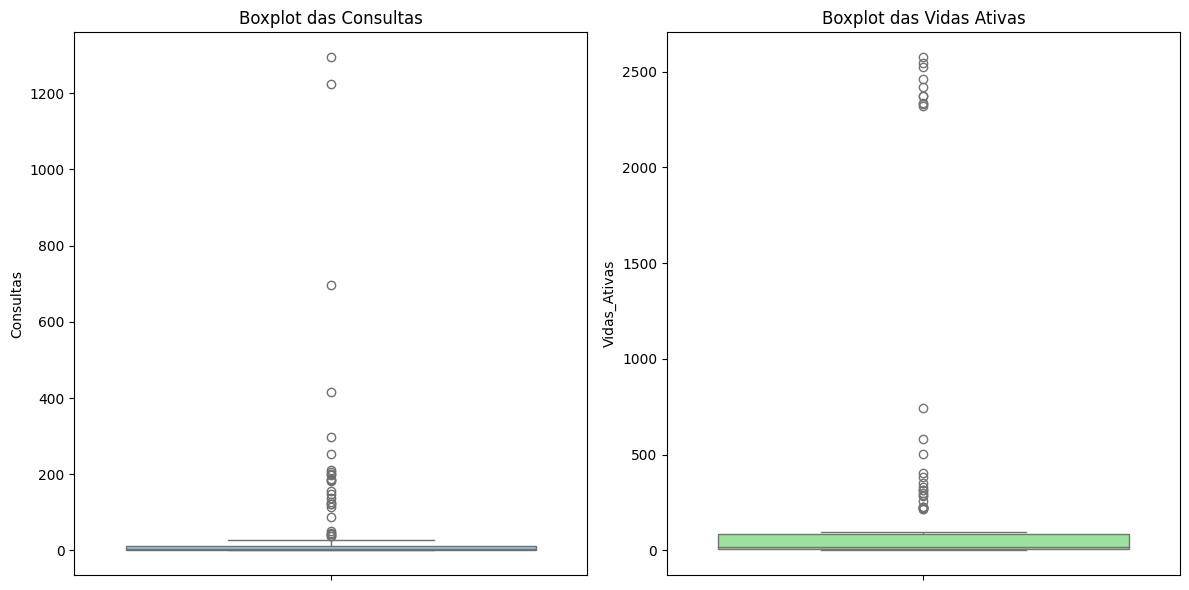

In [12]:
# Criar boxplot para 'CONSULTAS' e 'VIDAS ATIVAS'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Consultas'], color='skyblue')
plt.title('Boxplot das Consultas')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Vidas_Ativas'], color='lightgreen')
plt.title('Boxplot das Vidas Ativas')

plt.tight_layout()
plt.show()

In [13]:
# Executar o Data Profiling
aed_sv = sv.analyze(df, 
                    target_feat='Vidas_Ativas')

# Salva o arquivo HTML final com o relatório
aed_sv.show_html('vidas_ativas.html')

                                             |      | [  0%]   00:00 -> (? left)

Report vidas_ativas.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
# Executar o Data Profiling
aed_sv = sv.analyze(df, 
                    target_feat='Consultas')

# Salva o arquivo HTML final com o relatório
aed_sv.show_html('consultas.html')

                                             |      | [  0%]   00:00 -> (? left)

Report consultas.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Cálculo da Sinistralidade por Mês

In [14]:
# Conversão da coluna 'PERIODO' para DateTime com inferência de formato
df['Periodo'] = pd.to_datetime(df['Periodo'], dayfirst=True, errors='coerce')

# Filtro das linhas com datas válidas
df = df.dropna(subset=['Periodo'])

# Agrupamento por ano e mês e somar as consultas e vidas ativas
df_agrupado = df.groupby(df['Periodo'].dt.to_period('M')).agg({'Consultas': 'sum', 'Vidas_Ativas': 'sum'}).reset_index()

# Cálculo a média de sinistralidade por mês
df_agrupado['Sinistralidade_Media'] = ((df_agrupado['Consultas'] / df_agrupado['Vidas_Ativas']) * 100).round(2)

# Adição da coluna 'ANO_MES' ao DataFrame df_media_sinistralidade
df_media_sinistralidade = df_agrupado.copy()

# Exibição das primeiras linhas do DataFrame
df_media_sinistralidade.head(10)

,Periodo,Consultas,Vidas_Ativas,Sinistralidade_Media
0,2023-08,1526,3713,41.10
1,2023-09,1540,3591,42.88
2,2023-10,978,3506,27.90
3,2023-11,639,3337,19.15
4,2023-12,494,3274,15.09
5,2024-01,475,3212,14.79
6,2024-02,399,3204,12.45
7,2024-03,390,3152,12.37
8,2024-04,407,3113,13.07
9,2024-05,404,3096,13.05


In [15]:
# Remoção dos pontos das strings
df['Consultas'] = df['Consultas'].astype(str).str.replace('.', '', regex=False)
df['Vidas_Ativas'] = df['Vidas_Ativas'].astype(str).str.replace('.', '', regex=False)

# Conversão de float para int
df['Consultas'] = df['Consultas'].astype(float).astype(int)
df['Vidas_Ativas'] = df['Vidas_Ativas'].astype(float).astype(int)

# Filtro das linhas com datas válidas e converter PERIODO para DateTime
df['Periodo'] = pd.to_datetime(df['Periodo'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Periodo'])

# Agrupamento por empresa, mês, somando consultas e vidas ativas
df['ANO_MES'] = df['Periodo'].dt.to_period('M')
df_agrupado_empresa_mes = df.groupby(['Empresa', 'ANO_MES']).agg({'Consultas': 'sum', 'Vidas_Ativas': 'sum'}).reset_index()

# Cálculo da média de sinistralidade por mês para cada empresa
df_agrupado_empresa_mes['Sinistralidade_Media'] = ((df_agrupado_empresa_mes['Consultas'] / df_agrupado_empresa_mes['Vidas_Ativas']) * 100).round(2)

# Listagem das empresas disponíveis e adicionar a opção "Todas as Empresas"
empresas = df_agrupado_empresa_mes['Empresa'].unique().tolist()
empresas.insert(0, 'Todas as Empresas')

# Função para plotar o gráfico de sinistralidade por mês para uma empresa selecionada ou para todas as empresas
def plot_sinistralidade_mes_empresa(empresa):
    plt.figure(figsize=(12, 8))
    
    if empresa == 'Todas as Empresas':
        data = df_agrupado_empresa_mes.groupby('ANO_MES').agg({'Consultas': 'sum', 'Vidas_Ativas': 'sum'}).reset_index()
        data['Sinistralidade_Media'] = ((data['Consultas'] / data['Vidas_Ativas']) * 100).round(2)
        
        plt.plot(data['ANO_MES'].astype(str), data['Sinistralidade_Media'], marker='o', linestyle='-', color='#5B9F58', label=f'Sinistralidade Média - Todas as empresas')

        # Adição dos rótulos de dados com deslocamento vertical
        for i, txt in enumerate(data['Sinistralidade_Media']):
            plt.annotate(f'{txt}%', (data['ANO_MES'].astype(str).iloc[i], txt), textcoords="offset points", xytext=(12, 10), ha='center')
        
    else:
        data = df_agrupado_empresa_mes[df_agrupado_empresa_mes['Empresa'] == empresa]
        
        plt.plot(data['ANO_MES'].astype(str), data['Sinistralidade_Media'], marker='o', linestyle='-', color='#5B9F58', label=f'Sinistralidade Média - {empresa}')

        # Adição dos rótulos de dados com deslocamento vertical
        for i, txt in enumerate(data['Sinistralidade_Media']):
            plt.annotate(f'{txt}%', (data['ANO_MES'].astype(str).iloc[i], txt), textcoords="offset points", xytext=(12, 10), ha='center')

    
    # Adição dos títulos e rótulos
    plt.title(f'Média de Sinistralidade por Mês - {empresa}')
    plt.xlabel('Mês')
    plt.ylabel('Sinistralidade Média (%)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Widget de seleção para escolher a empresa
empresa_selector = widgets.Dropdown(
    options=empresas,
    value='Todas as Empresas',
    description='Empresa:',
    disabled=False
)

# Chamada da função interativa para plotar o gráfico
interact(plot_sinistralidade_mes_empresa, empresa=empresa_selector);

interactive(children=(Dropdown(description='Empresa:', options=('Todas as Empresas', 'Acesso Saúde', 'AssistPl…

# Cálculo da Sinistralidade por Trimestre

In [16]:
# Conversão da coluna 'PERIODO' para DateTime com inferência de formato
df['Periodo'] = pd.to_datetime(df['Periodo'], dayfirst=True, errors='coerce')

# Filtro das linhas com datas válidas
df = df.dropna(subset=['Periodo'])

# Agrupamento por ano e trimestre e somar as consultas e vidas ativas
df_agrupado_trimestral = df.groupby(df['Periodo'].dt.to_period('Q')).agg({'Consultas': 'sum', 'Vidas_Ativas': 'sum'}).reset_index()

# Cálculo a média de sinistralidade por trimestre
df_agrupado_trimestral['Sinistralidade_Media'] = ((df_agrupado_trimestral['Consultas'] / df_agrupado_trimestral['Vidas_Ativas']) * 100).round(2)

# Exibição do DataFrame resultante
df_agrupado_trimestral

,Periodo,Consultas,Vidas_Ativas,Sinistralidade_Media
0,2023Q3,3066,7304,41.98
1,2023Q4,2111,10117,20.87
2,2024Q1,1264,9568,13.21
3,2024Q2,811,6209,13.06


In [18]:
# Conversão da coluna 'PERIODO' para DateTime com inferência de formato
df['Periodo'] = pd.to_datetime(df['Periodo'], dayfirst=True, errors='coerce')

# Filtro das linhas com datas válidas
df = df.dropna(subset=['Periodo'])

# Agrupamento por empresa, trimestre e somar as consultas e vidas ativas
df['TRIMESTRE'] = df['Periodo'].dt.to_period('Q')
df_agrupado_empresa_trimestre = df.groupby(['Empresa', 'TRIMESTRE']).agg({'Consultas': 'sum', 'Vidas_Ativas': 'sum'}).reset_index()

# Cálculo da média de sinistralidade por trimestre para cada empresa
df_agrupado_empresa_trimestre['Sinistralidade_Media'] = ((df_agrupado_empresa_trimestre['Consultas'] / df_agrupado_empresa_trimestre['Vidas_Ativas']) * 100).round(2)

# Listagem das empresas disponíveis
empresas = df_agrupado_empresa_trimestre['Empresa'].unique().tolist()

# Função para plotar o gráfico de barras por trimestre e empresa selecionada
def plot_sinistralidade_trimestral(empresa):
    plt.figure(figsize=(12, 8))
    
    if empresa == 'Todas as empresas':
        data = df_agrupado_empresa_trimestre.groupby('TRIMESTRE').agg({'Consultas': 'sum', 'Vidas_Ativas': 'sum'}).reset_index()
        data['Sinistralidade_Media'] = ((data['Consultas'] / data['Vidas_Ativas']) * 100).round(2)
        
        x = data['TRIMESTRE'].astype(str)
        y = data['Sinistralidade_Media']
        
        plt.bar(x, y, width=0.4, color='#5B9F58', label=f'Sinistralidade Média - Todas as empresas')

        # Adição dos rótulos de dados com deslocamento vertical
        for i, txt in enumerate(data['Sinistralidade_Media']):
            plt.annotate(f'{txt}%', (data['TRIMESTRE'].astype(str).iloc[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

    else:
        data_empresa = df_agrupado_empresa_trimestre[df_agrupado_empresa_trimestre['Empresa'] == empresa]
        x = data_empresa['TRIMESTRE'].astype(str)
        y = data_empresa['Sinistralidade_Media']
        
        plt.bar(x, y, width=0.4, color='#5B9F58', label=f'Sinistralidade Média - {empresa}')

        # Adição dos rótulos de dados com deslocamento vertical
        for i, txt in enumerate(data_empresa['Sinistralidade_Media']):
            plt.annotate(f'{txt}%', (data_empresa['TRIMESTRE'].astype(str).iloc[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

    # Adição dos títulos e rótulos
    plt.title(f'Média de Sinistralidade por Trimestre - {empresa}')
    plt.xlabel('Trimestre')
    plt.ylabel('Sinistralidade Média (%)')

    # Adição da legenda
    plt.legend()

    # Melhoria da exibição dos rótulos do eixo x
    plt.xticks(rotation=45)

    # Remoção das grades
    plt.grid(False)

    # Exibição do gráfico
    plt.tight_layout()
    plt.show()

# Widget de seleção para escolher a empresa
empresas.insert(0, 'Todas as empresas')
empresa_selector = widgets.Dropdown(
    options=empresas,
    value='Todas as empresas',
    description='Empresa:',
    disabled=False
)

# Função interativa para atualizar o gráfico com base na empresa selecionada
interact(plot_sinistralidade_trimestral, empresa=empresa_selector);

interactive(children=(Dropdown(description='Empresa:', options=('Todas as empresas', 'Acesso Saúde', 'AssistPl…

# Cálculo da Sinistralidade por Setor

In [17]:
# Filtro das linhas com datas válidas e converter PERIODO para DateTime
df['Periodo'] = pd.to_datetime(df['Periodo'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Periodo'])

# Agrupamento por setor e mês, somando consultas e vidas ativas
df['ANO_MES'] = df['Periodo'].dt.to_period('M')
df_agrupado_setor_mes = df.groupby(['Setor', 'ANO_MES']).agg({'Consultas': 'sum', 'Vidas_Ativas': 'sum'}).reset_index()

# Cálculo da média de sinistralidade por mês para cada setor
df_agrupado_setor_mes['Sinistralidade_Media'] = ((df_agrupado_setor_mes['Consultas'] / df_agrupado_setor_mes['Vidas_Ativas']) * 100).round(2)

# Listagem dos meses disponíveis e adicionar a opção "Todo o Período"
meses = df_agrupado_setor_mes['ANO_MES'].unique().tolist()
meses.insert(0, 'Todo o Período')

# Função para plotar o gráfico de sinistralidade por setor para um mês selecionado ou para todo o período
def plot_sinistralidade_mes(mes):
    if mes == 'Todo o Período':
        data = df_agrupado_setor_mes.groupby('Setor').agg({'Consultas': 'sum', 'Vidas_Ativas': 'sum'}).reset_index()
        data['Sinistralidade_Media'] = ((data['Consultas'] / data['Vidas_Ativas']) * 100).round(2)
    else:
        data = df_agrupado_setor_mes[df_agrupado_setor_mes['ANO_MES'] == mes]
    
    plt.figure(figsize=(14, 10))
    plt.bar(data['Setor'], data['Sinistralidade_Media'], color='#5B9F58', label='Sinistralidade Média por Setor')

    plt.legend()
    
    # Adição dos rótulos de dados nas barras
    for i, txt in enumerate(data['Sinistralidade_Media']):
        plt.annotate(f'{txt}%', (i, txt), textcoords="offset points", xytext=(0, 10), ha='center')
    
    # Adição dos títulos e rótulos
    plt.title(f'Sinistralidade Média por Setor - {mes}')
    plt.xlabel('Setor')
    plt.ylabel('Sinistralidade Média (%)')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Criação de um widget de seleção para escolher o mês
mes_selector = widgets.Dropdown(
    options=meses,
    description='Mês:',
    disabled=False
)

# Uso do widget interativo para atualizar o gráfico com base no mês selecionado
interact(plot_sinistralidade_mes, mes=mes_selector);

interactive(children=(Dropdown(description='Mês:', options=('Todo o Período', Period('2023-08', 'M'), Period('…